In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam

from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

Using TensorFlow backend.


In [2]:

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.3,horizontal_flip=True)


In [3]:
data_dir=os.path.join(r'\project_dataset\train')

In [4]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [5]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     subset='training',class_mode='binary'
                                                     )

Found 3284 images belonging to 2 classes.


In [6]:
validation_data_gen =image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=10,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   subset='validation',class_mode='binary'
                                                     )

Found 1407 images belonging to 2 classes.


In [7]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output=output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

C:\Users\Shubham\Anaconda3\envs\tensorflow\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

C:\Users\Shubham\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  import sys


In [8]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(restnet)
model.add(Dense(512, activation='relu', input_dim=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
history=model.fit_generator(
            train_data_gen,
            steps_per_epoch=8,
            epochs=30,
            validation_data=validation_data_gen,
            validation_steps=8,verbose=2)

Epoch 1/30
 - 114s - loss: 17.2763 - accuracy: 0.5195 - val_loss: 5.1552 - val_accuracy: 0.5000
Epoch 2/30
 - 102s - loss: 3.9861 - accuracy: 0.6875 - val_loss: 1.4871 - val_accuracy: 0.4875
Epoch 3/30
 - 104s - loss: 1.9993 - accuracy: 0.7695 - val_loss: 4.2442 - val_accuracy: 0.4750
Epoch 4/30
 - 104s - loss: 0.9470 - accuracy: 0.8633 - val_loss: 1.8139 - val_accuracy: 0.4375
Epoch 5/30
 - 96s - loss: 0.8608 - accuracy: 0.8934 - val_loss: 1.0816 - val_accuracy: 0.5875
Epoch 6/30
 - 106s - loss: 1.3235 - accuracy: 0.8516 - val_loss: 2.0461 - val_accuracy: 0.4625
Epoch 7/30
 - 95s - loss: 0.7556 - accuracy: 0.9023 - val_loss: 5.7999 - val_accuracy: 0.4750
Epoch 8/30
 - 98s - loss: 1.9740 - accuracy: 0.8633 - val_loss: 2.9126 - val_accuracy: 0.3875
Epoch 9/30
 - 106s - loss: 1.5525 - accuracy: 0.8633 - val_loss: 3.1448 - val_accuracy: 0.5750
Epoch 10/30
 - 102s - loss: 1.1838 - accuracy: 0.9102 - val_loss: 4.7609 - val_accuracy: 0.4875
Epoch 11/30
 - 113s - loss: 0.4594 - accuracy: 0.92

In [11]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [12]:
model.save('FINALENDMODEL.h5')

In [2]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.image as mpimg

[[1]]


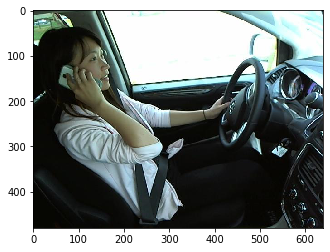

In [5]:
img_width, img_height = 224, 224
model= tf.keras.models.load_model('FINALENDMODEL.h5')
img = image.load_img('img_33.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=1)
print(classes)
im = mpimg.imread("img_33.jpg")
plt.imshow(im)
plt.show()

In [17]:
#[0]-safe driving
#[1]-not safe driving